In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
import random
from scipy.stats import spearmanr

In [2]:
alpha_screen = pd.read_csv("../../data/alpha_mae_df_magnet.csv", index_col=0)
alpha_screen

,alphas,mae_list,rsquared,all_maes
0,0.01,1.209717,-0.101177,"[1.2833111901161918, 1.2427715440558973, 1.262..."
1,0.02,1.216642,-0.077018,"[1.2428841395488492, 1.1996455821979584, 1.232..."
2,0.03,1.199347,-0.076150,"[1.219686928271385, 1.171880594452226, 1.17760..."
3,0.04,1.180015,-0.042372,"[1.1932068236057167, 1.1766033764224906, 1.172..."
4,0.05,1.167393,-0.049287,"[1.1390925473820197, 1.1572182267106577, 1.156..."
...,...,...,...,...
95,0.96,1.047324,0.166238,"[1.0438014028308547, 1.0529261333002478, 1.019..."
96,0.97,1.043135,0.179458,"[1.000945664254834, 1.0431332753448128, 1.0390..."
97,0.98,1.049270,0.165032,"[1.077785886813751, 1.0709375766016795, 1.0277..."
98,0.99,1.048554,0.166442,"[1.0546607788032751, 1.053918760446371, 1.0529..."


Text(0, 0.5, 'MAE')

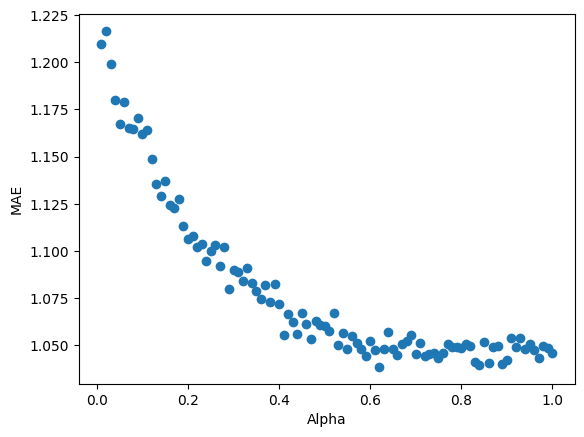

In [3]:
plt.scatter(x=alpha_screen.alphas, y= alpha_screen.mae_list)
plt.xlabel("Alpha")
plt.ylabel("MAE")

In [4]:
error_low = []
error_high = []
min_mae = np.inf
best_alpha = None
best_alpha_stdev = None
for index, row in alpha_screen.iterrows():
    cv =  ast.literal_eval(row["all_maes"])
    error_low.append(np.percentile(cv, 5))
    error_high.append(np.percentile(cv, 95))
    mean_mae = row["mae_list"]
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_alpha = row["alphas"]
        best_alpha_stdev = np.std(cv)


In [5]:
best_alpha

0.62

In [6]:
best_alpha_stdev

0.036668250195566694

In [7]:
min_mae

1.038424939213923

In [8]:
best_alpha_plus_std = min_mae + best_alpha_stdev
best_alpha_plus_std

1.0750931894094897

In [9]:
chosen_alpha_df = alpha_screen[alpha_screen["mae_list"] < best_alpha_plus_std]
chosen_alpha_df = chosen_alpha_df[chosen_alpha_df["alphas"] > best_alpha]
chosen_alpha_df.sort_values(by="mae_list", inplace=True)
chosen_alpha = chosen_alpha_df["alphas"].iloc[0]
chosen_alpha

0.8400000000000001

In [10]:
light_green = (0.0, 0.6, 0.5)
pink = (1, 0.078, 0.576)

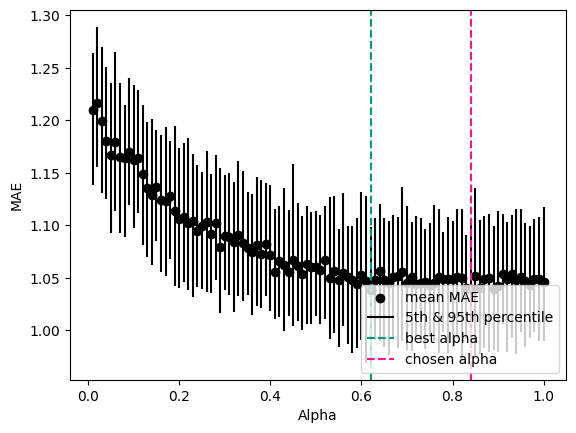

In [11]:
plt.scatter(x=alpha_screen.alphas, 
            y= alpha_screen.mae_list,
            c='k',
            label="mean MAE")
plt.vlines(alpha_screen.alphas, 
           error_low, 
           error_high,
           colors='k',
           label = "5th & 95th percentile")
plt.axvline(x=best_alpha, color=light_green, linestyle='--', label = "best alpha")
plt.axvline(x=chosen_alpha, color=pink, linestyle='--', label = "chosen alpha")
plt.xlabel("Alpha")
plt.ylabel("MAE")
plt.legend(loc="lower right")

In [15]:
mae_df = pd.read_csv("../../data/results_ave_mae_magnet.csv", index_col=0)
mae_df

,Gene,ave_MAE
0,Feature_92,1.177807
1,Feature_39,1.178260
2,Feature_97,1.178057
3,Feature_54,1.178381
4,Feature_137,1.176920
...,...,...
171,Feature_62,1.176209
172,Feature_63,1.176891
173,Feature_57,1.179611
174,Feature_65,1.179094


            Gene   ave_MAE
117   Feature_12  1.133891
165  Feature_179  1.134746
118  Feature_144  1.137448
88    Feature_18  1.157777
33   Feature_198  1.162699


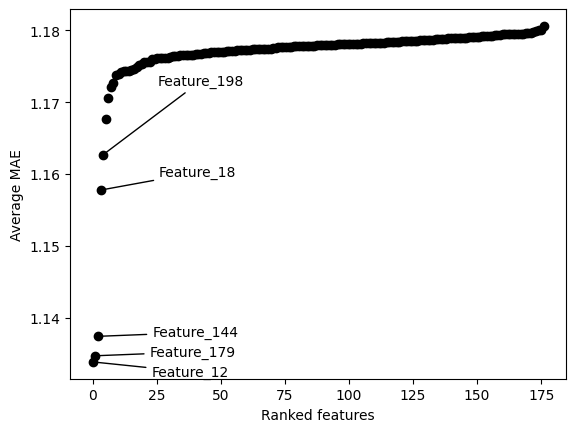

In [17]:
mae_df.sort_values(by="ave_MAE", inplace=True)

print(mae_df.head())

mae_list = list(mae_df["ave_MAE"])
feature_list = list(mae_df["Gene"])
x = np.linspace(0, len(mae_df), len(mae_df))
y = mae_list

plt.scatter(x, y, c='k')
plt.annotate(feature_list[0], (x[0], y[0]), textcoords="offset points", xytext=(70,-10), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.annotate(feature_list[1], (x[1], y[1]), textcoords="offset points", xytext=(70,0), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.annotate(feature_list[2], (x[2], y[2]), textcoords="offset points", xytext=(70,0), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.annotate(feature_list[3], (x[3], y[3]), textcoords="offset points", xytext=(70,10), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.annotate(feature_list[4], (x[4], y[4]), textcoords="offset points", xytext=(70,50), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.ylabel("Average MAE")
plt.xlabel("Ranked features")
plt.show()

Text(-0.18, 1.05, 'b)')

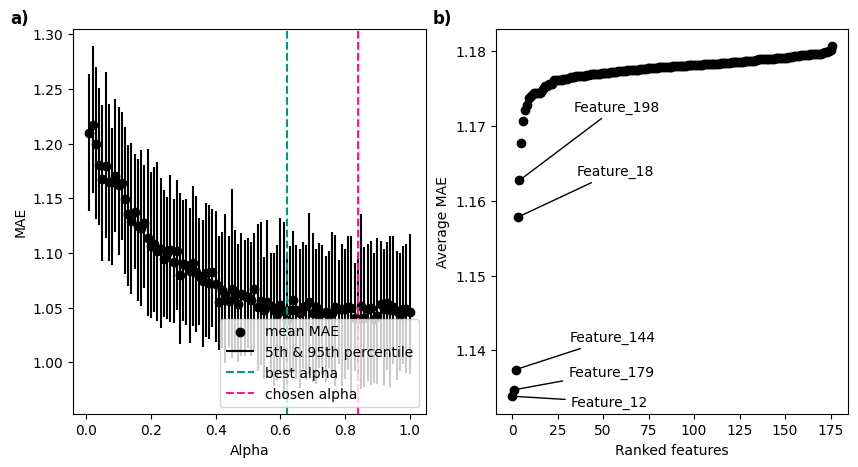

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

ax1.scatter(x=alpha_screen.alphas, 
            y= alpha_screen.mae_list,
            c='k',
            label="mean MAE")
ax1.vlines(alpha_screen.alphas, 
           error_low, 
           error_high,
           colors='k',
           label = "5th & 95th percentile")
ax1.axvline(x=best_alpha, color=light_green, linestyle='--', label = "best alpha")
ax1.axvline(x=chosen_alpha, color=pink, linestyle='--', label = "chosen alpha")
ax1.set_xlabel("Alpha")
ax1.set_ylabel("MAE")
ax1.legend(loc="lower right")

ax2.scatter(x, y, c='k')
ax2.annotate(feature_list[0], (x[0], y[0]), textcoords="offset points", xytext=(70,-7), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
ax2.annotate(feature_list[1], (x[1], y[1]), textcoords="offset points", xytext=(70,10), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
ax2.annotate(feature_list[2], (x[2], y[2]), textcoords="offset points", xytext=(70,20), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
ax2.annotate(feature_list[3], (x[3], y[3]), textcoords="offset points", xytext=(70,30), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
ax2.annotate(feature_list[4], (x[4], y[4]), textcoords="offset points", xytext=(70,50), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

ax2.set_ylabel("Average MAE")
ax2.set_xlabel("Ranked features")

ax1.text(-0.18, 1.05, 'a)', transform=ax1.transAxes, fontsize=12, fontweight='bold', va='top')
ax2.text(-0.18, 1.05, 'b)', transform=ax2.transAxes, fontsize=12, fontweight='bold', va='top')

In [67]:
# Top genes
top20genes = list(mae_df.head(20)["Gene"])
top20genes

['LOC106566372',
 'hba',
 'LOC106607380',
 'duox',
 'LOC106583594',
 'LOC106601072',
 'pgfrl',
 'LOC106601071',
 'LOC106578021',
 'LOC123724067',
 'LOC106561261',
 'LOC106596975',
 'LOC106602771',
 'otub1',
 'LOC106603702',
 'LOC106602341',
 'LOC123723984',
 'LOC106583220',
 'LOC106588007',
 'LOC106594147']

In [39]:
['LOC106566372',
 'hba',
 'LOC106607380',
 'duox',
 'LOC106583594',
 'LOC106601072',
 'pgfrl',
 'LOC106601071',
 'LOC106578021',
 'LOC123724067']

['LOC106566372',
 'hba',
 'LOC106607380',
 'duox',
 'LOC106583594',
 'LOC106601072',
 'pgfrl',
 'LOC106601071',
 'LOC106578021',
 'LOC123724067']

In [17]:
salmon_GO = pd.read_csv("../../data/salmon_GO_annotations.tsv", sep='\t')
salmon_GO

,SYMBOL,ENTREZID,GENENAME,GO,ONTOLOGY,GO.term
0,1433b,100196586.0,14-3-3 protein beta/alpha,NaN,NaN,NaN
1,143b2,100195171.0,14-3-3 protein beta/alpha-2,GO:0004497,MF,"Term = \monooxygenase activity\"""""
2,143g1,100380373.0,14-3-3 protein gamma-1,NaN,NaN,NaN
3,143g2,100194987.0,14-3-3 protein gamma-2,NaN,NaN,NaN
4,2a5e,100195340.0,Serine/threonine-protein phosphatase 2A 56 kDa...,GO:0000159,CC,"Term = \protein phosphatase type 2A complex\"""""
...,...,...,...,...,...,...
96336,zufsp,100380430.0,zinc finger containing ubiquitin peptidase 1,NaN,NaN,NaN
96337,zwilch,106584830.0,zwilch kinetochore protein,NaN,NaN,NaN
96338,zyg11,106613955.0,"zyg-11 family member, cell cycle regulator",NaN,NaN,NaN
96339,zzef1,106567411.0,"zinc finger, ZZ-type with EF hand domain 1",GO:0005509,MF,"Term = \calcium ion binding\"""""


In [65]:
contains_hemoglobin = salmon_GO.dropna()
contains_hemoglobin = contains_hemoglobin[contains_hemoglobin["GENENAME"].str.contains("hemoglobin")]
contains_hemoglobin.shape

(100, 6)

In [43]:
# Calc for the probability of encountering hemoglobin genes 5 times
all_gene_names = list(salmon_GO["GENENAME"].unique())
len(all_gene_names)

32357

In [57]:
hemoglobin_count_list = []
for iteration in range(10000000):
    random20 = random.sample(all_gene_names, 20)
    hemoglobin_count = 0
    for gene in random20:
        if "hemoglobin" in str(gene):
            hemoglobin_count += 1
    hemoglobin_count_list.append(hemoglobin_count)

In [66]:
max(hemoglobin_count_list)

2

Text(0.5, 0, 'Number of hemoglobin genes')

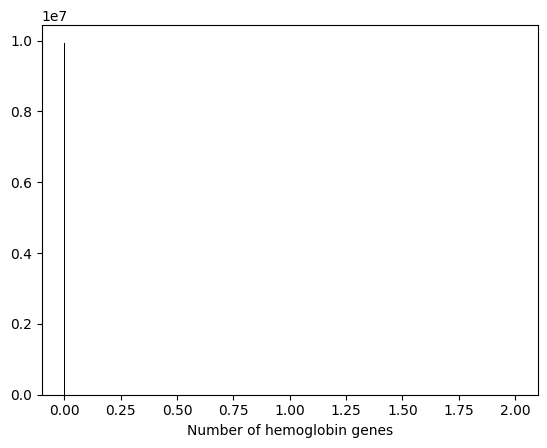

In [60]:
plt.hist(hemoglobin_count_list, bins=1000, color='k')
plt.xlabel("Number of hemoglobin genes")

In [52]:
random20

['ArfGAP with FG repeats 1b',
 'uncharacterized LOC123723907',
 'uncharacterized LOC106608428',
 'K0090 protein',
 'death-associated protein kinase 3',
 'WD repeat containing, antisense to TP73',
 'uncharacterized LOC106600526',
 'cytosolic endo-beta-N-acetylglucosaminidase-like',
 'phosphorylase b kinase regulatory subunit beta',
 'insulin-like growth factor binding protein 5 paralog B1',
 'probable H/ACA ribonucleoprotein complex subunit 1',
 'zinc finger protein 710',
 'cAMP-regulated phosphoprotein, 21',
 'protein Wnt-3a',
 'chromosome ssa05 CXorf65 homolog',
 'mannose-specific lectin-like',
 'lysine (K)-specific demethylase 2Ab',
 'BRF2 RNA polymerase III transcription initiation factor subunit',
 'uncharacterized LOC123727177',
 'crystallin, mu']

In [71]:
transcriptome_XY = pd.read_csv("../../data/transcriptome_XY.csv", index_col=0)
transcriptome_XY

,1433b,143b2,143g1,2a5e,4f2,5nt1a,LOC100136352,LOC100136353,LOC100136354,LOC100136364,...,znt4,znt6,zranb2,zswim5,zswim8,zte38,zufsp,zyg11,zzef1,gutted.weight.kg
F001,8.298729,10.908738,9.425202,8.779539,10.929669,7.111388,12.583505,11.712159,10.124062,8.345641,...,8.489126,8.190617,7.973296,7.882944,8.636611,8.999665,6.577016,7.471161,8.272468,3.240
F002,8.228803,10.642114,8.008146,8.664696,9.849611,7.783078,12.492871,12.026031,11.429684,7.701277,...,7.205885,8.132349,8.658153,7.593406,7.944367,9.163664,6.542679,6.748560,8.465317,4.180
F003,8.643025,10.539054,8.000962,8.201590,10.582260,7.636555,12.700801,11.418342,10.488037,8.113418,...,8.579031,8.124747,8.715461,7.483913,8.381856,8.696754,6.865387,7.501747,8.243687,5.890
F004,5.956833,10.835880,8.092081,8.547840,9.075364,8.207422,13.283415,11.583582,11.180475,7.705314,...,6.195422,7.561927,8.849315,8.027654,8.051427,9.126017,6.565920,6.900831,8.453580,4.890
F005,6.892844,11.015085,7.600201,8.461058,9.100262,7.466592,12.768129,11.846070,10.495586,7.677500,...,6.701055,7.873324,8.836080,8.150358,7.853622,9.499643,6.491205,7.128698,7.930806,3.980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F450,8.197073,10.629662,9.355759,8.723406,10.701376,7.170370,13.095476,11.476600,12.086811,7.735623,...,7.634688,8.306277,8.400094,7.608247,8.134562,8.630035,6.433649,7.553774,8.322352,1.645
F456,7.759628,11.055183,8.654288,9.059819,9.624544,7.364918,12.835405,11.793184,12.456062,7.485766,...,7.485766,6.749432,9.106140,7.485766,8.103360,7.977881,6.280543,7.023918,8.727422,1.980
F458,9.983777,11.766481,8.220540,8.019322,10.493871,7.168827,13.948246,11.870888,12.054974,8.744106,...,7.168827,7.375141,7.168827,7.375141,8.744106,7.051999,5.033837,6.163356,7.996756,1.120
F459,8.409117,10.899049,9.156758,8.108310,9.991265,7.827205,13.391611,11.956632,13.295898,6.904554,...,6.669984,6.399689,8.064149,5.999265,5.033837,7.879397,5.033837,5.999265,6.669984,0.960


In [72]:
hemoglobin_genes = ["hba", "LOC106607380", "LOC106601072", "LOC106601071", "LOC123724067"]
hemoglobin_genes_df = transcriptome_XY[hemoglobin_genes]
hemoglobin_genes_df

,hba,LOC106607380,LOC106601072,LOC106601071,LOC123724067
F001,7.841489,6.684127,9.049141,6.934034,7.471161
F002,8.049102,7.776955,8.876601,7.313821,7.894540
F003,9.321372,9.142760,10.515895,8.078872,9.749636
F004,9.442323,7.953808,10.629716,9.164211,7.985053
F005,9.187983,8.223300,10.425331,8.316614,7.714572
...,...,...,...,...,...
F450,9.183097,8.909547,10.836300,8.788188,9.540840
F456,10.432081,9.924495,11.906412,9.321568,9.459813
F458,8.419208,8.547975,9.500379,6.595032,6.923386
F459,6.873686,5.033837,6.992821,7.403194,5.033837


In [73]:
hemoglobin_genes_df.corr()

,hba,LOC106607380,LOC106601072,LOC106601071,LOC123724067
hba,1.000000,0.900110,0.946565,0.907537,0.764438
LOC106607380,0.900110,1.000000,0.901939,0.787359,0.839774
LOC106601072,0.946565,0.901939,1.000000,0.914895,0.765783
LOC106601071,0.907537,0.787359,0.914895,1.000000,0.600831
LOC123724067,0.764438,0.839774,0.765783,0.600831,1.000000


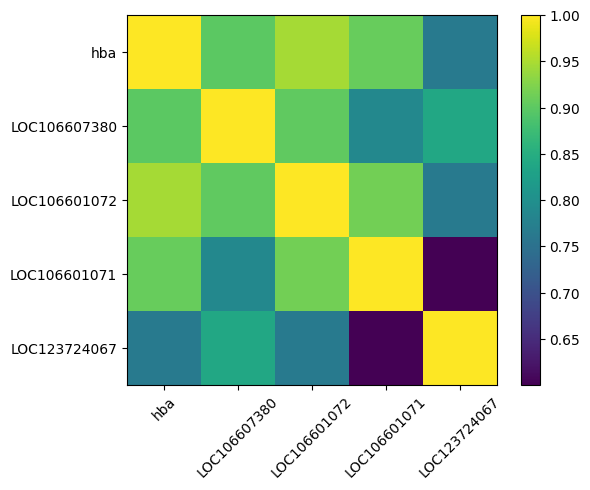

In [81]:
plt.imshow(hemoglobin_genes_df.corr())
plt.xticks(np.arange(len(hemoglobin_genes)), hemoglobin_genes, rotation=45)
plt.yticks(np.arange(len(hemoglobin_genes)), hemoglobin_genes)
plt.colorbar()

In [75]:
for hgene_a in hemoglobin_genes:
    for hgene_b in hemoglobin_genes:
        if hgene_a != hgene_b:
            rho, p_value = spearmanr(x, y)
            print(hgene_a, hgene_b, p_value)

hba LOC106607380 0.0
hba LOC106601072 0.0
hba LOC106601071 0.0
hba LOC123724067 0.0
LOC106607380 hba 0.0
LOC106607380 LOC106601072 0.0
LOC106607380 LOC106601071 0.0
LOC106607380 LOC123724067 0.0
LOC106601072 hba 0.0
LOC106601072 LOC106607380 0.0
LOC106601072 LOC106601071 0.0
LOC106601072 LOC123724067 0.0
LOC106601071 hba 0.0
LOC106601071 LOC106607380 0.0
LOC106601071 LOC106601072 0.0
LOC106601071 LOC123724067 0.0
LOC123724067 hba 0.0
LOC123724067 LOC106607380 0.0
LOC123724067 LOC106601072 0.0
LOC123724067 LOC106601071 0.0
